# ECD-UY: Disaggregated energy consumption by appliance subset

This notebook presents the minimum code steps to load the subset and start to work with its records.

In [6]:
# python
import datetime
from typing import List, Tuple, Union
import glob
from os.path import join, exists
from os import makedirs
import yaml
import warnings
from datetime import datetime, timedelta

# data-science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 5]
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

print("Pandas version {}".format(pd.__version__))

Populating the interactive namespace from numpy and matplotlib
Pandas version 1.0.5


## Download the subset

In [7]:
!curl -O https://url-to-repo/ecd-uy/disaggregated-energy-consumption-by-appliance-subset.tar.gz
!tar xzf disaggregated-energy-consumption-by-appliance-subset.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: url-to-repo
tar: Error opening archive: Failed to open 'disaggregated-energy-consumption-by-appliance-subset.tar.gz'


## Declare the path where the files are located

In [8]:
BASE_DATA_SOURCE = "./disaggregated-energy-consumption-by-appliance-subset"
# BASE_DATA_SOURCE = "../../DATOS-MINUTAL-DESAG-UTE-STANDARDIZED"

## Load customers data

In [9]:
data_appliances = pd.read_csv(
    BASE_DATA_SOURCE + '/customers.csv',
)

data_appliances.head()

,customer_id,department,section,segment,zone
0,1,1,24,125,18
1,2,3,37,226,82
2,3,1,12,236,5
3,4,1,5,204,3
4,5,1,18,223,4


## Load appliances data

In [10]:
data_appliances = pd.read_csv(
    BASE_DATA_SOURCE + '/appliances.csv',
)

data_appliances.head()

,customer_id,meter_id,appl_desc,appl_type
0,7,00124B0018D6F607,HOME_CONSUMPTION�,site meter
1,7,00124B0002CBAC13,Sobre Enchufe AC 2 (Cuarto Grande),air conditioner
2,7,000D6F0010370DC8,Termostato (Living),THERMOSTAT
3,7,00124B0002CBAD56,Sobre Enchufe AC (Living),air conditioner
4,7,00124B0002CBAEBB,Sobre Enchufe Calef�n (Ba�o),electric water heating appliance


## Load appliances consumption data

In [11]:
filenames = glob.glob(BASE_DATA_SOURCE + '/appl_consumption_data_*.csv')

data_appl_consum = [pd.read_csv(
    fname,
    parse_dates=["datetime"],
    infer_datetime_format=True,
) for fname in filenames]

# Concatenate all the read files in a single dataframe
data_appl_consum = pd.concat(data_appl_consum, ignore_index=True)

data_appl_consum.head()

,datetime,meter_id,ACTIVEENERGY,ACTIVEPOWER,ACTIVEPOWER_PH1,ACTIVEPOWER_PH2,ACTIVEPOWER_PH3
0,2019-08-27 16:00:05,00124B0002CBABF1,2.0,120.0,120.0,0.0,0.0
1,2019-08-27 16:00:05,00124B0002CBAC13,0.0,0.0,0.0,0.0,0.0
2,2019-08-27 16:00:05,00124B0002CBAC43,0.0,0.0,0.0,0.0,0.0
3,2019-08-27 16:00:05,00124B0002CBAC6D,0.0,1.0,1.0,0.0,0.0
4,2019-08-27 16:00:05,00124B0002CBACAF,0.0,0.0,0.0,0.0,0.0


## Load thermostats data

In [12]:
filenames = glob.glob(BASE_DATA_SOURCE + '/thermostat_data_*.csv')

data_thermostats = [pd.read_csv(
    fname,
    parse_dates=["datetime"],
    infer_datetime_format=True,
) for fname in filenames]

# Concatenate all the read files in a single dataframe
data_thermostats = pd.concat(data_thermostats, ignore_index=True)

data_thermostats.head()

,datetime,meter_id,AMBIENTTEMP,SETPOINT
0,2019-08-27 16:00:05,000D6F00040DB60E,17.8,NaN
1,2019-08-27 16:00:05,000D6F000D83E3CB,17.3,NaN
2,2019-08-27 16:00:05,000D6F0010370DC8,19.3,7.0
3,2019-08-27 16:00:05,000D6F001037247D,22.6,NaN
4,2019-08-27 16:01:05,000D6F00040DB60E,17.8,20.5


## Load total consumption data

In [13]:
filenames = glob.glob(BASE_DATA_SOURCE + '/consumption_data_*.csv')

data_total_consum = [pd.read_csv(
    fname,
    parse_dates=["datetime"],
    infer_datetime_format=True,
) for fname in filenames]

# Concatenate all the read files in a single dataframe
data_total_consum = pd.concat(data_total_consum, ignore_index=True)

data_total_consum.head()

,datetime,meter_id,ACTIVEENERGY,ACTIVEENERGY_PH1,ACTIVEENERGY_PH2,ACTIVEENERGY_PH3,REACTIVEENERGY,REACTIVEENERGY_PH1,REACTIVEENERGY_PH2,REACTIVEENERGY_PH3,...,CURRENT_PH1,CURRENT_PH2,CURRENT_PH3,POWERFACTOR,POWERFACTOR_PH1,POWERFACTOR_PH2,POWERFACTOR_PH3,VOLTAGE_PH1,VOLTAGE_PH2,VOLTAGE_PH3
0,2019-08-27 16:00:05,00124B0018D6F607,4.0,19830.0,0.0,0.0,0.0,4765.0,4.0,0.0,...,1.27,0.0,0.0,0.86,0.86,0.0,0.0,223.0,0.0,0.0
1,2019-08-27 16:00:05,00124B0018D6F752,4.0,29250.0,0.0,0.0,0.0,111554.0,0.0,1.0,...,1.23,0.0,0.0,0.84,0.84,0.0,0.0,230.0,0.0,0.0
2,2019-08-27 16:00:05,00124B0018D6F755,8.0,1845536.0,0.0,0.0,1.0,211591.0,0.0,0.0,...,2.35,0.0,0.0,0.84,0.84,0.0,0.0,215.0,0.0,0.0
3,2019-08-27 16:00:05,00124B0018D6FB1E,3.0,12563.0,0.0,0.0,1.0,58587.0,0.0,0.0,...,1.13,0.0,0.0,0.68,0.68,0.0,0.0,236.0,0.0,0.0
4,2019-08-27 16:00:06,00124B0018D7080C,0.0,0.0,0.0,0.0,0.0,15979.0,89.0,5.0,...,0.23,0.0,0.0,-0.27,-0.27,0.0,0.0,233.0,0.0,0.0


## Example
Plot the average hourly consumption of some appliance types.

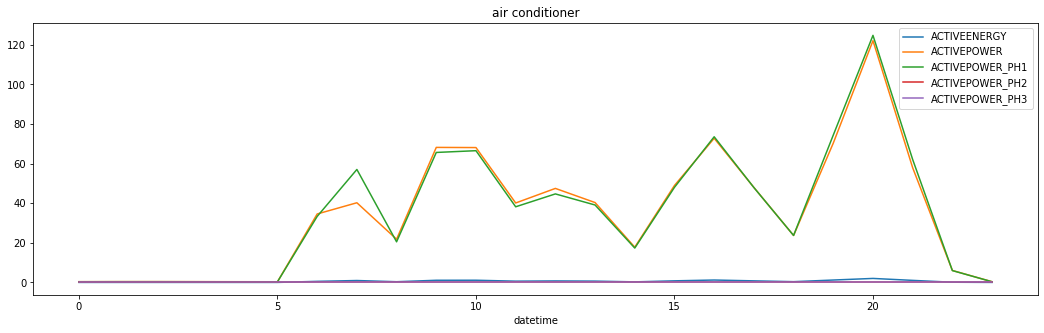

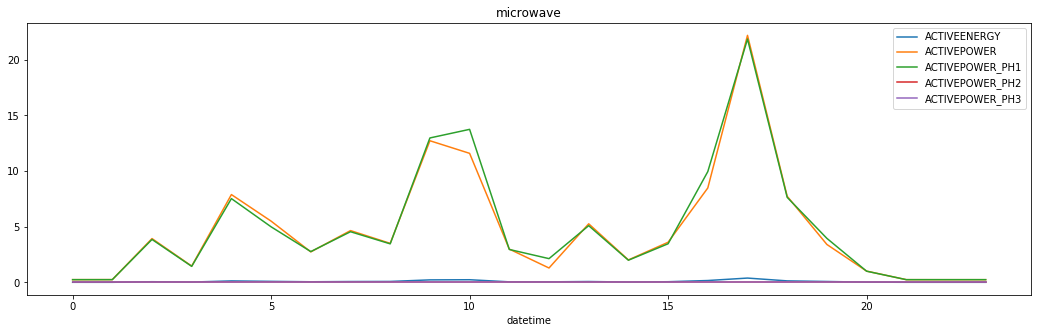

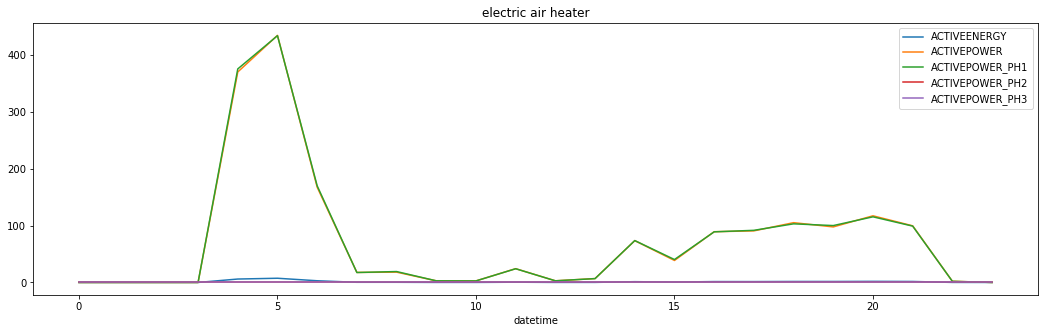

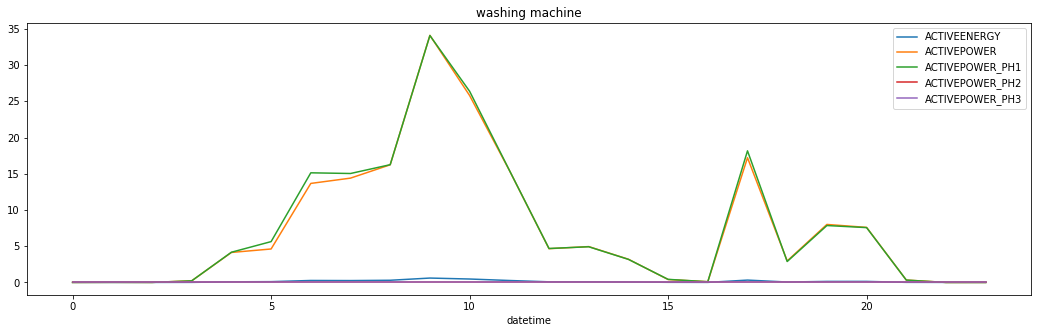

In [32]:
for appl_t in ["air conditioner", "microwave", "electric air heater", "washing machine"]:
    appl_t_ids = data_appliances[data_appliances.appl_type == appl_t].meter_id
    
    data_appl_consum[data_appl_consum.meter_id.isin(appl_t_ids)].groupby(
        data_appl_consum.datetime.dt.hour
    ).mean().plot()
    
    plt.title(appl_t)
